<a href="https://colab.research.google.com/github/noushin94/NLP/blob/main/NLP_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import re
import spacy
from spacy.matcher import Matcher
import string
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [10]:
# Load the dataset
df = pd.read_csv('/content/Resume.csv')

In [11]:
df

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR
...,...,...,...,...
2479,99416532,RANK: SGT/E-5 NON- COMMISSIONED OFFIC...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2480,24589765,"GOVERNMENT RELATIONS, COMMUNICATIONS ...","<div class=""fontsize fontface vmargins hmargin...",AVIATION
2481,31605080,GEEK SQUAD AGENT Professional...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION
2482,21190805,PROGRAM DIRECTOR / OFFICE MANAGER ...,"<div class=""fontsize fontface vmargins hmargin...",AVIATION


In [12]:
# finding out different job titles in csv file
for value in df['Category'].unique():
  print(value)

HR
DESIGNER
INFORMATION-TECHNOLOGY
TEACHER
ADVOCATE
BUSINESS-DEVELOPMENT
HEALTHCARE
FITNESS
AGRICULTURE
BPO
SALES
CONSULTANT
DIGITAL-MEDIA
AUTOMOBILE
CHEF
FINANCE
APPAREL
ENGINEERING
ACCOUNTANT
CONSTRUCTION
PUBLIC-RELATIONS
BANKING
ARTS
AVIATION


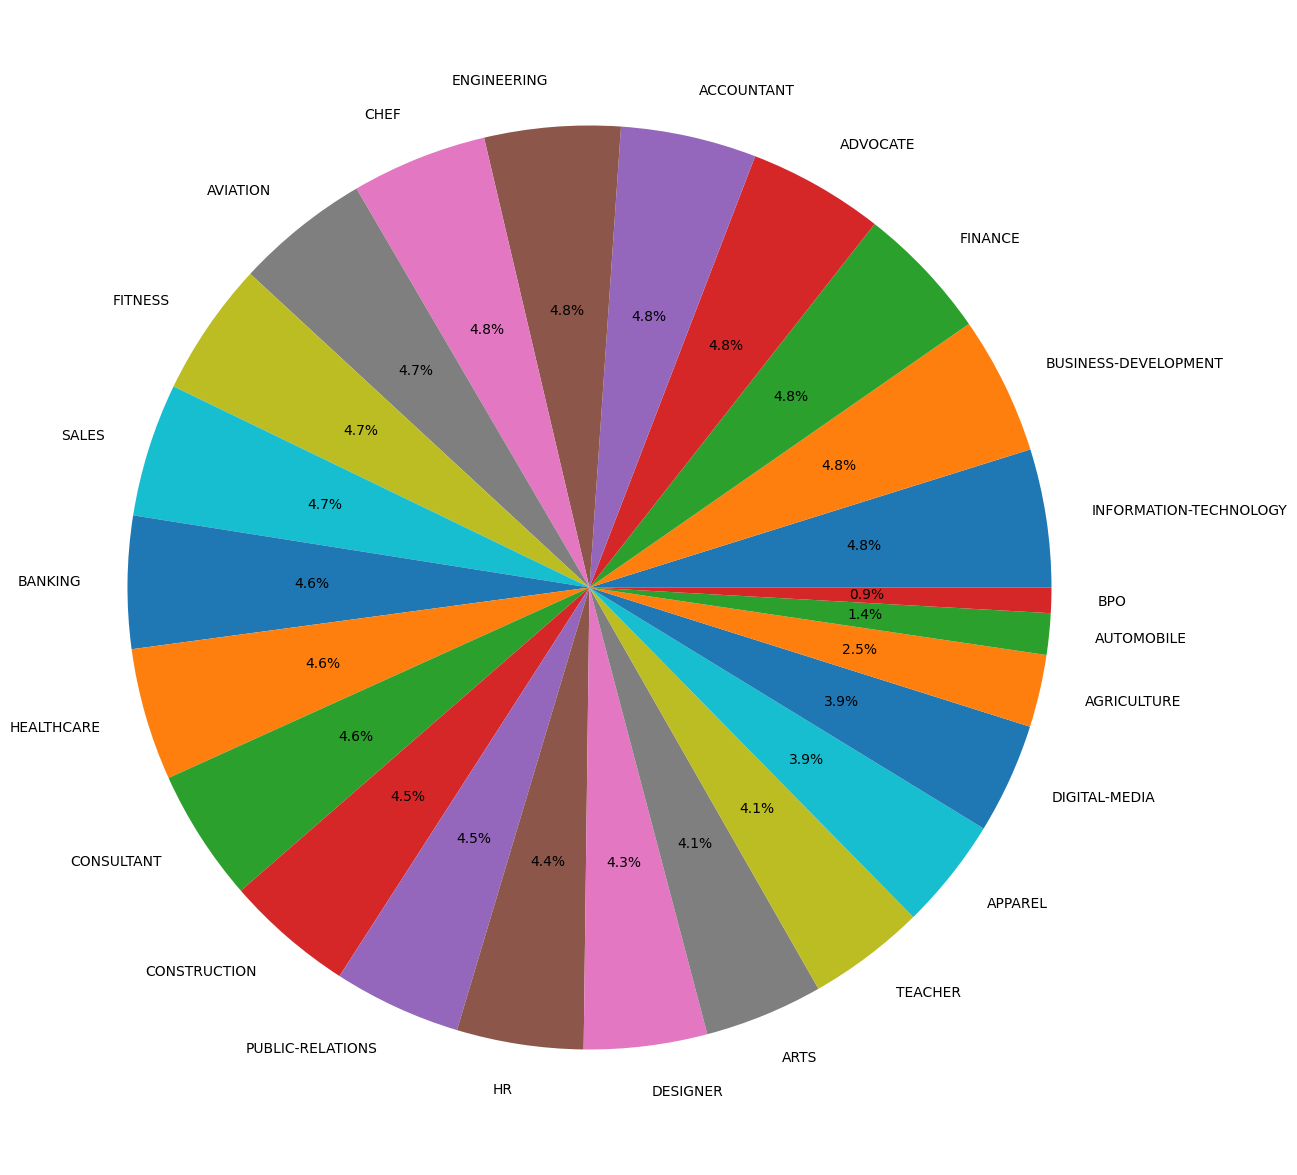

In [13]:
category=df['Category'].value_counts().reset_index()
category

plt.figure(figsize=(15,15))
plt.pie(category['Category'],labels=category['index'], colors=None, autopct='%1.1f%%')
plt.show()

# data preprocessing


**data cleaning**

In [14]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters, URLs, and email addresses
    text = re.sub(r'http\S+|www\S+|https\S+|email\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Apply masking to escape sequences
    text = text.replace('\n', ' ')
    # Mask numbers and string fragmentations
    text = re.sub(r'\d+', 'NUM', text)
    text = re.sub(r'\b\w\b', '', text)
    return text

In [15]:
df['cleaned_text'] = df['Resume_str'].apply(clean_text)

**work tokentisation and stop word**

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
# Word Tokenization and Stopwords Removal
stop_words = set(stopwords.words('english')) # the standard english language stop word  is implemented
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


**stemming and lemmatization**

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
# text normalizing
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
df['cleaned_text'] = df['cleaned_text'].apply(lambda x: ' '.join([stemmer.stem(lemmatizer.lemmatize(word)) for word in x.split()]))


**visualization of stop words**

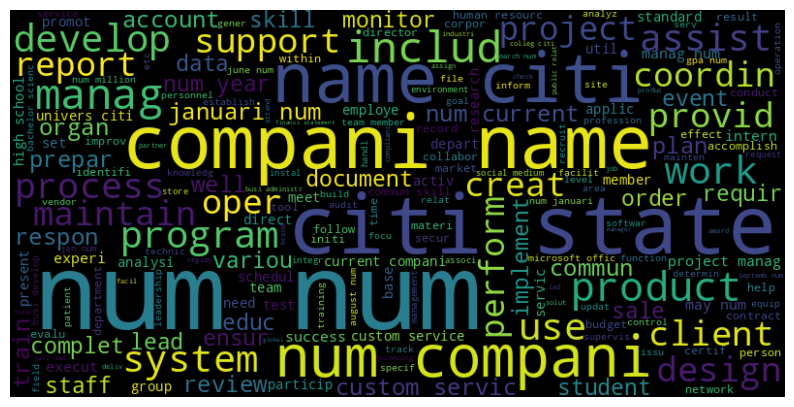

In [20]:
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(df['cleaned_text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


**label encoding**

In [21]:
# converting categorical to numerical
label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# feature Engineering

In [22]:
# Feature Engineering with TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['Category']

## spliting data to train and test

In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# classification

In [24]:

# Classification Models
classifiers = [RandomForestClassifier(), GradientBoostingClassifier(), MultinomialNB()]

for classifier in classifiers:
    # Training the model
    model = classifier.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation Metrics
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    classification_report_str = classification_report(y_test, y_pred)

    # Print results
    print(f"Classifier: {classifier.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion)
    print("Classification Report:")
    print(classification_report_str)
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: RandomForestClassifier
Accuracy: 0.75
Confusion Matrix:
[[27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0 24  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  2  1  1  0  0  1]
 [ 1  0  1  0  0  0  0  2  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  2]
 [ 0  0  0 10  2  0  0  1  0  0  0  1  1  1  0  1  0  0  1  0  0  0  1  1]
 [ 0  0  0  1  4  0  0  1  0  0  2  0  0  1  0  2  1  0  0  2  0  1  0  3]
 [ 0  0  1  0  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0]
 [ 0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0  0]
 [ 1  0  0  0  0  0  0 13  0  1  0  0  0  0  0  0  6  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  1  0  0  0 20  0  0  0  0  0  0  1  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0 30  0  0  0  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
import spacy
from spacy.matcher import Matcher

In [26]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [27]:
# Define a sample job description
job_description = """
We are looking for a software engineer with strong programming skills and experience in web development.
The ideal candidate should have a solid understanding of Python, JavaScript, and web frameworks.
Experience with database management and cloud services is a plus. Good communication skills and
the ability to work in a team are essential.
"""

In [28]:
# Process the job description text
job_description_doc = nlp(job_description)

In [29]:
# Define the keywords and skills you are looking for
keywords = ["software engineer", "programming", "web development", "Python", "JavaScript", "database", "cloud services"]

In [30]:
# Initialize spaCy Matcher
matcher = Matcher(nlp.vocab)

In [31]:
# Create pattern for matching keywords
keyword_patterns = [{"LOWER": keyword.lower()} for keyword in keywords]

In [32]:
# Add the patterns to the matcher
matcher.add("Keywords", [keyword_patterns])

In [33]:
# Function to screen resumes
def screen_resume(resume_text):
    # Process the resume text
    resume_doc = nlp(resume_text)

    # Use the matcher to find matches in the resume
    matches = matcher(resume_doc)

    # Calculate a matching score based on the number of matches
    matching_score = len(matches)

    return matching_score

In [34]:
# Example resumes to screen
resume1 = """
I am a software engineer with strong programming skills in Python and JavaScript.
I have experience in web development and database management.
I am a team player with excellent communication skills.
"""

In [35]:
resume2 = """
I am a graphic designer with expertise in Adobe Creative Suite.
I have experience in designing logos, brochures, and websites.
I am creative and detail-oriented with a passion for visual aesthetics.
"""

In [36]:
# Screen the example resumes
score1 = screen_resume(resume1)
score2 = screen_resume(resume2)

In [37]:
# Print the screening results
print("Resume 1 Matching Score:", score1)
print("Resume 2 Matching Score:", score2)

Resume 1 Matching Score: 0
Resume 2 Matching Score: 0


In [38]:
# Determine if the resumes pass the screening based on a threshold
threshold = 3
if score1 >= threshold:
    print("Resume 1 passes the screening!")
else:
    print("Resume 1 does not meet the criteria.")

if score2 >= threshold:
    print("Resume 2 passes the screening!")
else:
    print("Resume 2 does not meet the criteria.")

Resume 1 does not meet the criteria.
Resume 2 does not meet the criteria.
